# This program is used to generate daily mean from hourly data. it is using netcdf data and indian state boundary for advanced level plotting.

#### Written by - Chandrima Chakrabarty (chakrabartychandrima91@gmail.com)

In [8]:
#!conda install netcdf4
from netCDF4 import Dataset
import numpy as np
import xarray as xr

from matplotlib import cm

In [9]:
import os
os.environ['PROJ_LIB'] = '/usr/share/proj'

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [1]:
ds=xr.open_dataset('/home/ubuntu/ferret_plots/test_d1_211019.nc')
ds

In [12]:
lons = ds.lon[:]
lats = ds['lat'][:]
rain = ds['rainc'][:]+ds['rainnc'][:]
times = ds['time'][:]

In [13]:
##rain[0:23,:,:,:].mean()
rain_211019=rain[0:24,:,:,:].mean('time')

0 24


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


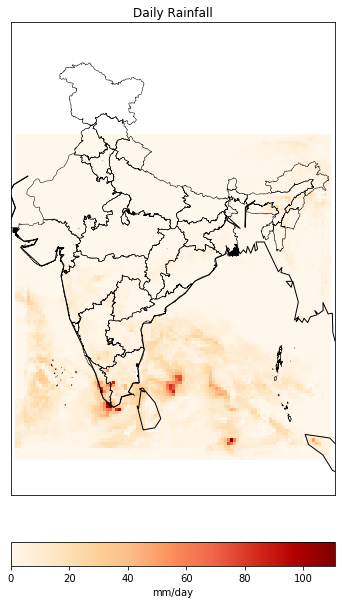

24 48


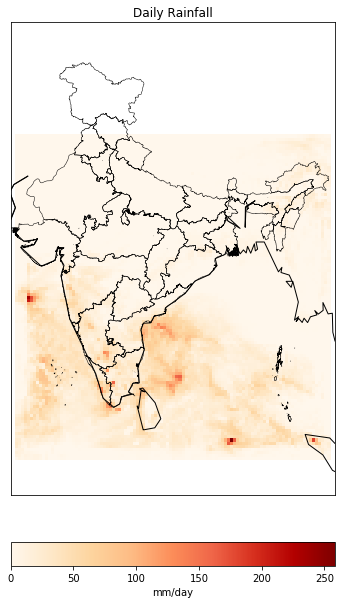

48 72


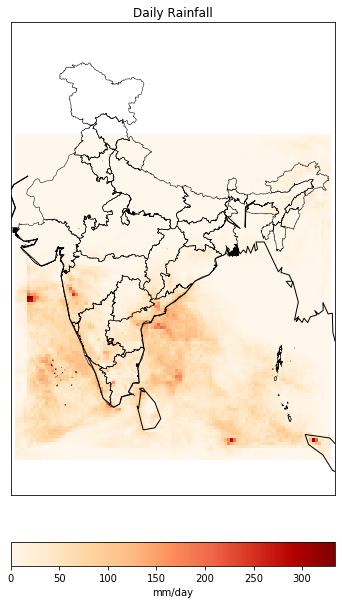

72 96


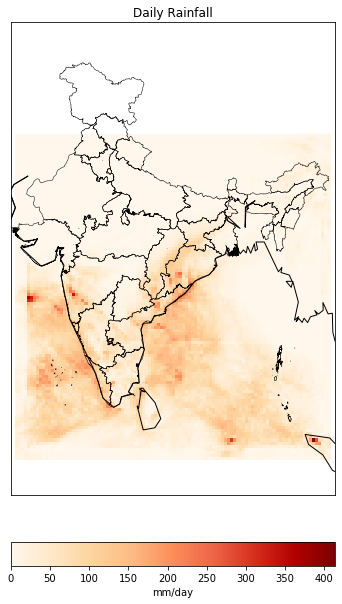

96 120


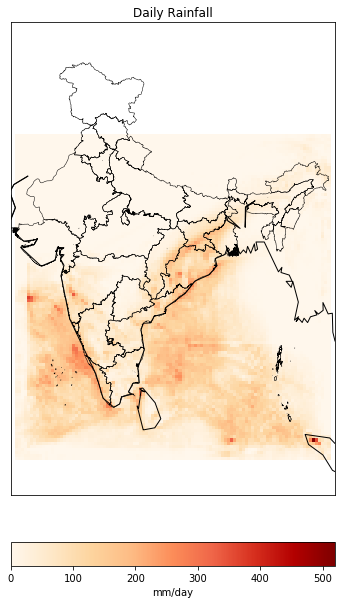

120 144


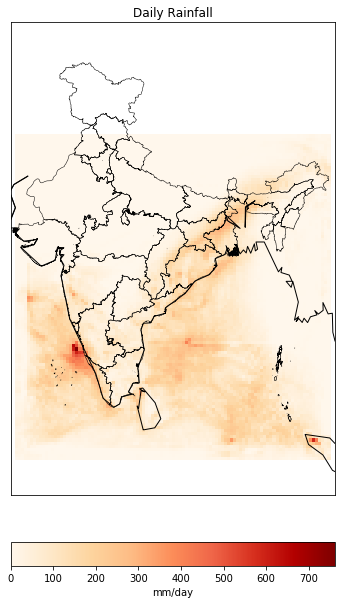

144 168


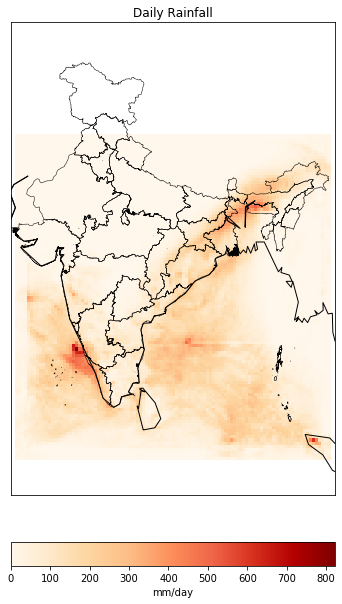

In [16]:
st = 0 ; en = 24
for i in range(1,8):
    print(st,en)
    rain11 = rain[st:en,:,:,:].mean('time')
    
    m        = Basemap(resolution='c',projection='merc',llcrnrlat=0,urcrnrlat=40,llcrnrlon=68,urcrnrlon=98)
    lon, lat = np.meshgrid(lons, lats)
    xi, yi   = m(lon, lat)
    plt.figure(figsize=[20,10])
    m.drawcoastlines()

    #m.drawcountries()

    m.readshapefile('/home/ubuntu/indiashapefiles/Admin2','state')
    cs   = m.pcolor(xi,yi,rain11[0,:,:],cmap=cm.OrRd)    
    cbar = m.colorbar(cs, location='bottom', pad="10%")
    cbar.set_label('mm/day')
    plt.title('Daily Rainfall')
    plt.savefig('/home/ubuntu/ferret_plots/21_27plots/rain'+ str(20+i) + '_10_2019.png',dpi=600)
    plt.show()
    import time
    time.sleep(5)
    
    st = st + 24
    en = en + 24
    

##### This portion is the automatic plot generation for all the parameters.

0 24


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()
/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


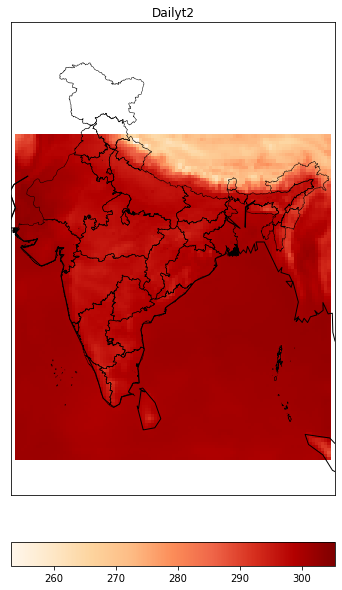

24 48


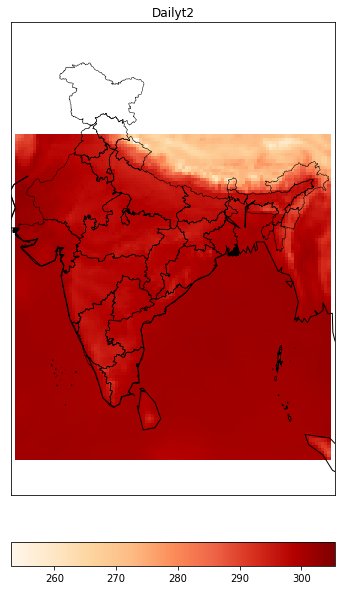

48 72


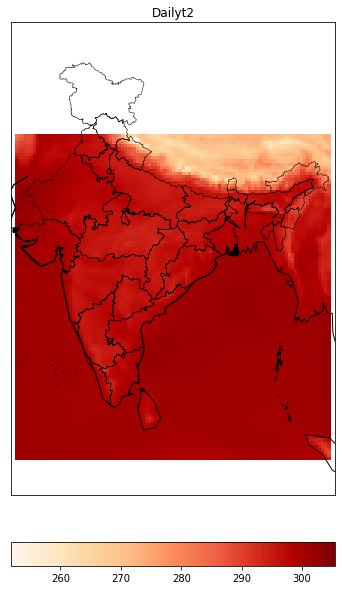

72 96


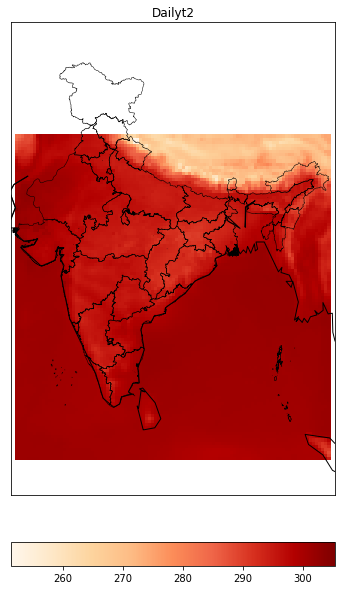

96 120


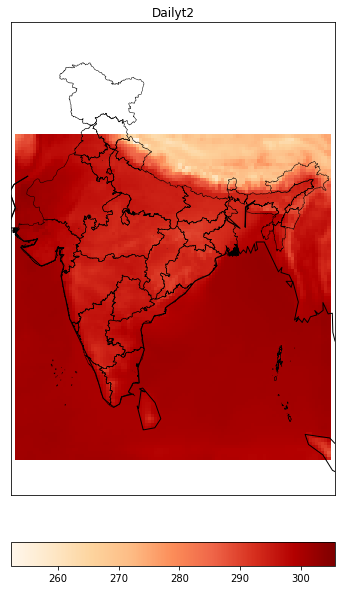

120 144


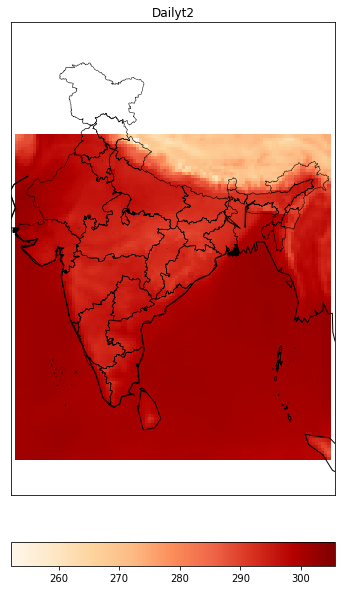

144 168


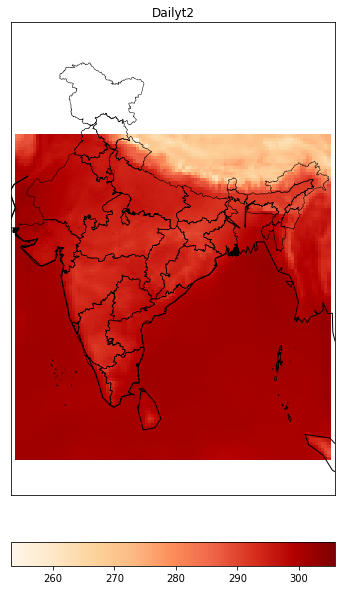

0 24


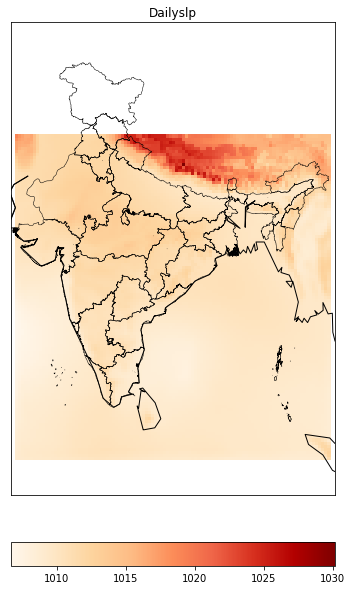

24 48


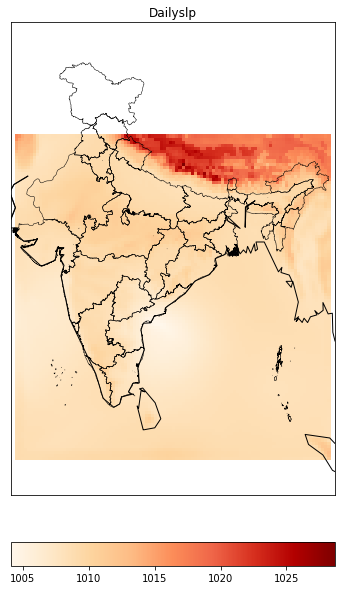

48 72


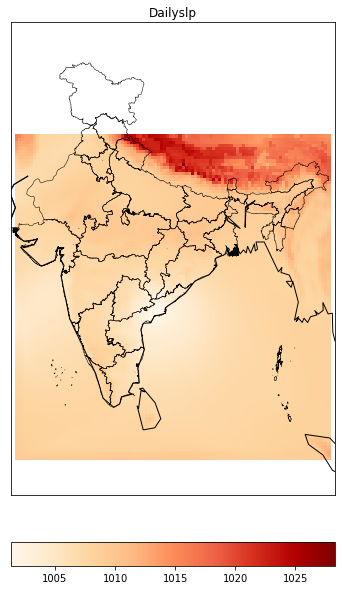

72 96


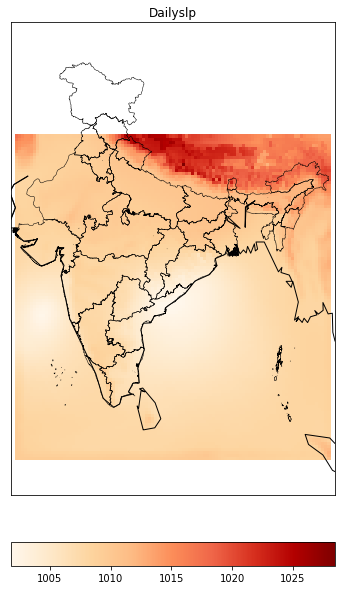

96 120


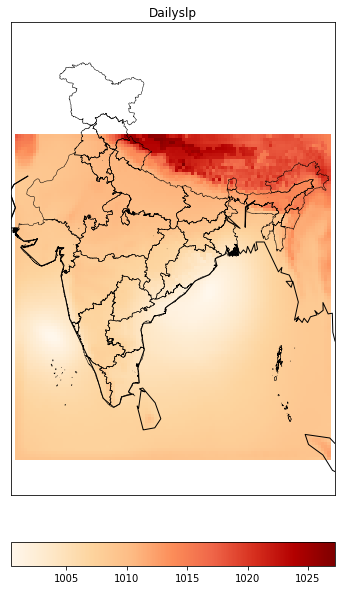

120 144


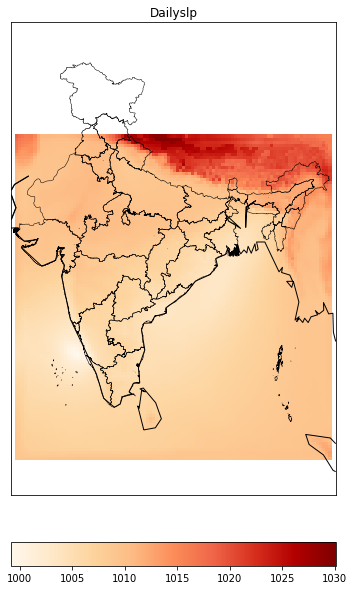

144 168


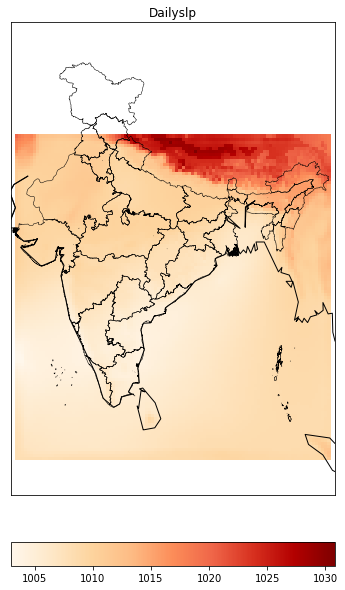

0 24


/home/ubuntu/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


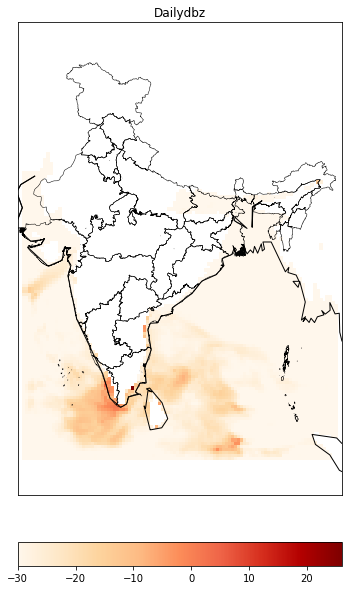

24 48


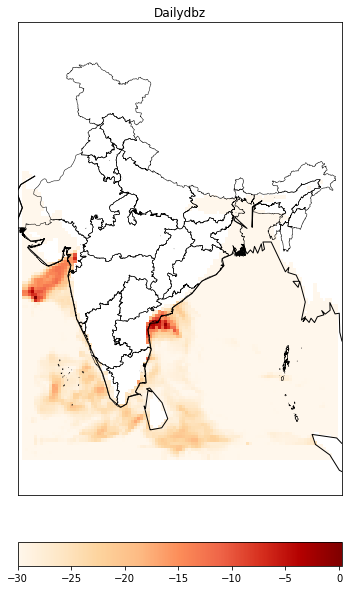

48 72


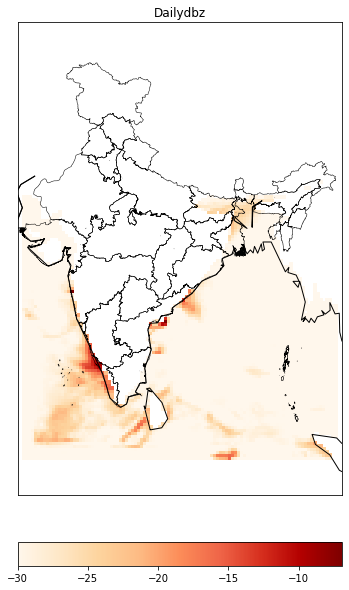

72 96


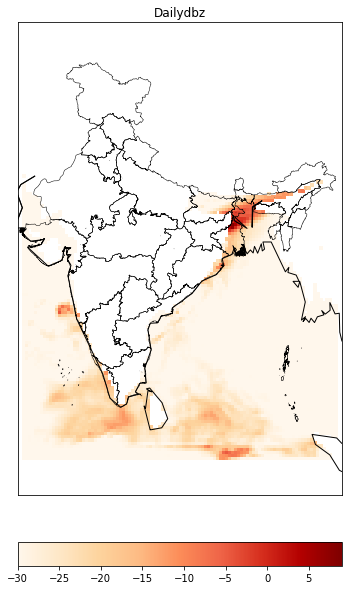

96 120


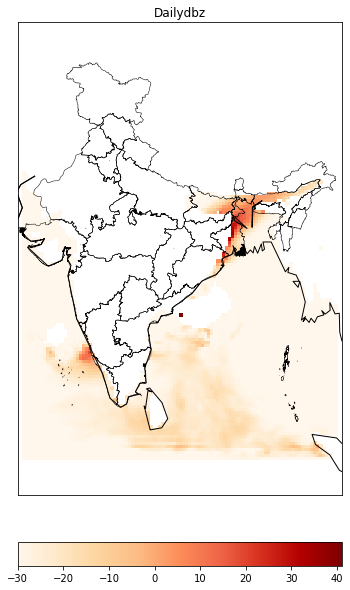

120 144


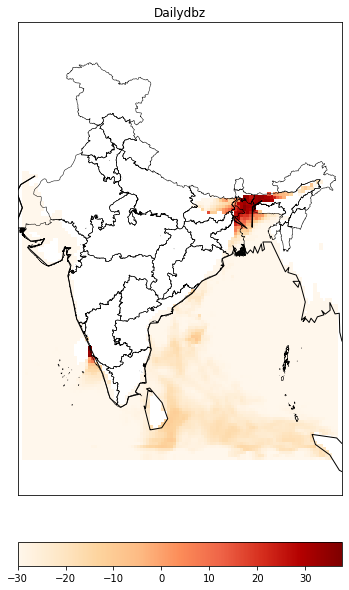

144 168


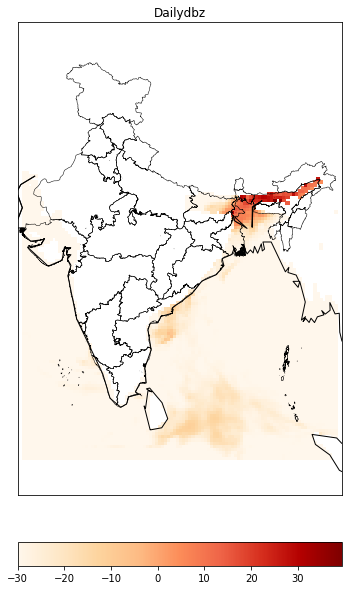

In [18]:

param = ['t2','slp','dbz']

for ii in range(0,len(param)):
    
    st = 0 ; en = 24
    for i in range(1,8):
        print(st,en) 
        data1 = ds[param[ii]][:]
        data2 = data1[st:en,:,:,:].mean('time')

        m        = Basemap(resolution='c',projection='merc',llcrnrlat=0,urcrnrlat=40,llcrnrlon=68,urcrnrlon=98)
        lon, lat = np.meshgrid(lons, lats)
        xi, yi   = m(lon, lat)
        plt.figure(figsize=[20,10])
        m.drawcoastlines()
        #m.drawcountries()
        m.readshapefile('/home/ubuntu/indiashapefiles/Admin2','state')
        cs   = m.pcolor(xi,yi,data2[0,:,:],cmap=cm.OrRd)    
        cbar = m.colorbar(cs, location='bottom', pad="10%")
        #cbar.set_label('mm/day')
        plt.title('Daily' + str(param[ii]))
        plt.savefig('/home/ubuntu/ferret_plots/21_27plots/'+str(param[ii])+ str(20+i) + '_10_2019.png',dpi=600)
        plt.show()
        import time
        time.sleep(5)

        st = st + 24
        en = en + 24
    

In [115]:
#inspect.cleandoc
m = Basemap(resolution='c',projection='merc',llcrnrlat=0,urcrnrlat=40,llcrnrlon=60,urcrnrlon=100)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


In [116]:
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

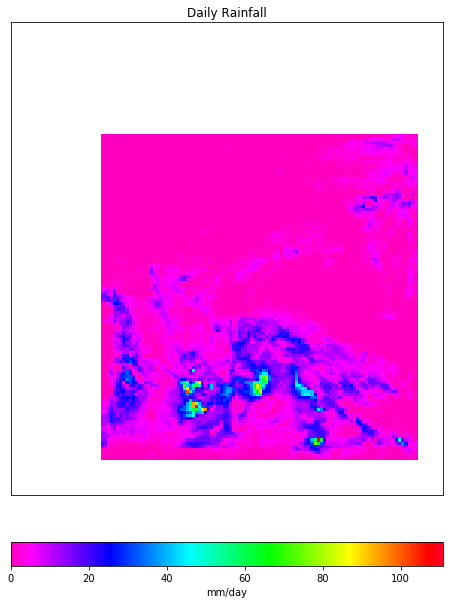

In [118]:
plt.figure(figsize=[20,10])
#m.drawcoastlines()
#m.drawstates()
#m.drawcountries()
#m.readshapefile('F:/chandrima/GIS/shape fils/india-soi15420715/shapefile_india/india-soi154207','INDIA')
#m.readshapefile('F:\chandrima\GIS\shape fils\india-soi15420715\india_state_shapefile/admin2','state')
cs = m.pcolor(xi,yi,rain_211019[0,:,:],cmap=cm.gist_rainbow_r)
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label('mm/day')
plt.title('Daily Rainfall')
plt.show()
#plt.savefig('F:/chandrima/WRF/plots/demo.jpg')